In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Why did Bernie Sanders Lose? - A 2016 Democratic Presidential Primary Analysis

    The 2016 US presidential election is widely considered to be a pivotal election in American politics for many reasons, and today I am looking to understand what caused the Democratic primary to turn out the way it did. The Democratic primary had two main contenders: Hillary Clinton and Bernie Sanders. In this analysis I hope I can adequately explain the victory of Hillary Clinton over Bernie Sanders. I found the two datasets that I will be using on kaggle, which is a website with a plethora of datasets for free download. The datasets can be found here: https://www.kaggle.com/datasets/benhamner/2016-us-election/data

### The county facts dataset

The first dataset I will import for this analysis is the county_facts.csv dataset, which as seen below contains a great amount of demographic data for each county in the US, with state and US rows included.

In [72]:
county=pd.read_csv("county_facts.csv")
display(county.head())

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


 The columns 4-54 have names corresponding to a description in another file called county_facts_dictionary.csv. 

In [73]:
county_dict=pd.read_csv("county_facts_dictionary.csv")
display(county_dict.head())

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"


### Cleaning up the data

For my analysis I am only focusing on county level results, so I will remove the statewide and nationwide rows from the dataset.

In [79]:
county=county.dropna(subset="state_abbreviation")
county.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
5,1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,...,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
6,1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,...,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9


Using the dictionary of descriptions for each column, I will rename the columns that I want to use in my analysis and then filter the original data to only include the renamed columns.

In [80]:
demographics=county.rename(columns={"INC110213" : "income","RHI725214" : "hispanic",
                              "RHI825214" : "white", "EDU685213" : "college",
                                    "POP060210" : "density","area_name":"county","SEX255214": "female", "RHI225214": "black"})
demographics=demographics[["fips","county","state_abbreviation","income","hispanic","white","college","density","female","black"]]
demographics.head()

,fips,county,state_abbreviation,income,hispanic,white,college,density,female,black
2,1001,Autauga County,AL,53682,2.7,75.6,20.9,91.8,51.4,18.7
3,1003,Baldwin County,AL,50221,4.6,83.0,27.7,114.6,51.2,9.6
4,1005,Barbour County,AL,32911,4.5,46.6,13.4,31.0,46.6,47.6
5,1007,Bibb County,AL,36447,2.1,74.5,12.1,36.8,45.9,22.1
6,1009,Blount County,AL,44145,8.7,87.8,12.1,88.9,50.5,1.8


### Primary Results Dataset

The next dataset to import is the primary election results for each county, which includes both Democratic and Republican primaries. 

In [3]:
primary=pd.read_csv("primary_results.csv")
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


I am only interested in the Democratic primary, so I will filter the results to only include results from the Democratic primary.

In [76]:
democrat=primary[primary["party"]=="Democrat"]
democrat.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


Next, I will find who won each county and leave out all other results, which means there will be one row per county.

In [ ]:
mask=democrat.groupby(["state","county"])["votes"].transform("max") == democrat['votes']
winners=democrat[mask]
winners.head()

Now it is time to merge our demographics dataset with the primary results dataset, which can be done with a simple merge on the fips value, which is a unique identifier for each county. This results in duplicate columns, so I will remove those as well as the fips value now that the datasets are merged.

In [81]:
winner_votes=pd.merge(winners,demographics,on="fips")
winner_votes=winner_votes.drop(["state_abbreviation_y","state_abbreviation_x","county_y","fips"],axis="columns")
winner_votes=winner_votes.rename(columns={"county_x":"county"})
winner_votes.head()

,state,county,party,candidate,votes,fraction_votes,income,hispanic,white,college,density,female,black
0,Alabama,Autauga,Democrat,Hillary Clinton,2387,0.800,53682,2.7,75.6,20.9,91.8,51.4,18.7
1,Alabama,Baldwin,Democrat,Hillary Clinton,5290,0.647,50221,4.6,83.0,27.7,114.6,51.2,9.6
2,Alabama,Barbour,Democrat,Hillary Clinton,2567,0.906,32911,4.5,46.6,13.4,31.0,46.6,47.6
3,Alabama,Bibb,Democrat,Hillary Clinton,942,0.755,36447,2.1,74.5,12.1,36.8,45.9,22.1
4,Alabama,Blount,Democrat,Hillary Clinton,564,0.551,44145,8.7,87.8,12.1,88.9,50.5,1.8


Now we can start digging into the data, with the first thing to check being how many counties each candidate won. This results in 1158 counties won by Bernie Sanders, and 1669 counties won by Hillary Clinton with no other candidates winning a single county.

In [7]:
winner_votes.groupby("candidate")["votes"].count()

candidate
Bernie Sanders     1158
Hillary Clinton    1669
Name: votes, dtype: int64

Next, using groupby I will create a dataframe that keeps track of how many counties each candidate won per state. Texas is the state with the most counties won by a single candidate, with Hillary Clinton winning 241 counties. 

In [8]:
counties_won=winner_votes.groupby(["state","candidate"])["votes"].count()
print(counties_won.idxmax())
counties_won["Texas"]

('Texas', 'Hillary Clinton')


candidate
Bernie Sanders      15
Hillary Clinton    241
Name: votes, dtype: int64

Arizona is the state with the fewest counties won by a single candidate, with Bernie Sanders only winning 1 county in the whole state compared to Hillary Clinton's 14.

In [10]:
print(counties_won.idxmin())
counties_won["Arizona"]

('Arizona', 'Bernie Sanders')


candidate
Bernie Sanders      1
Hillary Clinton    14
Name: votes, dtype: int64

### Population Density vs Income

Using our dataframe of data from each county's winner, I first decided to plot population density on the y axis against income for each county, with each candidate having their own graph. 

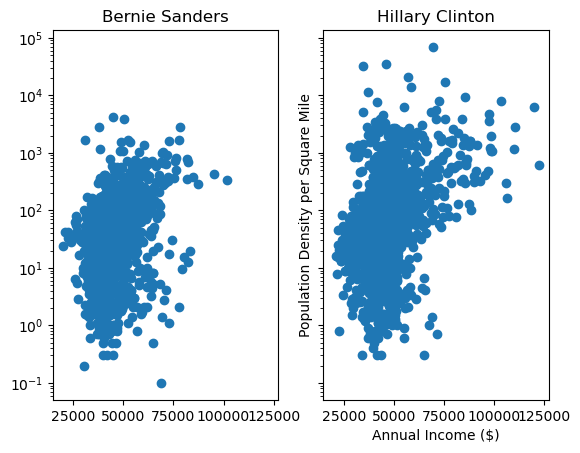

In [83]:
berniewin=winner_votes[winner_votes["candidate"]=="Bernie Sanders"]
hillarywin=winner_votes[winner_votes["candidate"]=="Hillary Clinton"]
f, (ax1, ax2) = plt.subplots(1, 2,sharex=True, sharey=True)
ax1.scatter(berniewin["income"], berniewin["density"])
plt.xlabel("Annual Income ($)")
plt.ylabel("Population Density per Square Mile")
ax1.set_title('Bernie Sanders')
ax2.set_title('Hillary Clinton')
ax1.set_yscale('log')
ax2.scatter(hillarywin["income"], hillarywin["density"])

There are some key takeaways from plotting population density vs income. The first thing to note is that there is a loose positive correlation between income and population density, which makes sense because urban counties are more likely to have high paying jobs. When comparing the two candidates, it is clear that Sanders did not win nearly as many densely populated counties as Hillary Clinton did, and he also won significantly fewer of the richest counties. The actual primary election is carried out by pledged delegates at the Democratic National Convention, and since the delegates are mostly distributed by population across the states it is very important to win the more densely populated counties in order to win the primary. In my opinion, Sanders' failure to win highly populated counties already explains a large portion of his ultimate loss.

### Performance Among African American Voters

There may be other obvious demographic trends that differ between the two candidates outside of income and population density, so the next place I want to look is at ethnicity. According to Pew Research, 19% of Clinton's voters in the general election were African Americans. This means that this is a large demographic to investigate for any potential differences between candidates. Below I graphed boxplots showing the distribution of counties won by percent black population.

<Axes: title={'center': 'Percent Black Population of Hillary Clinton Won Counties'}>

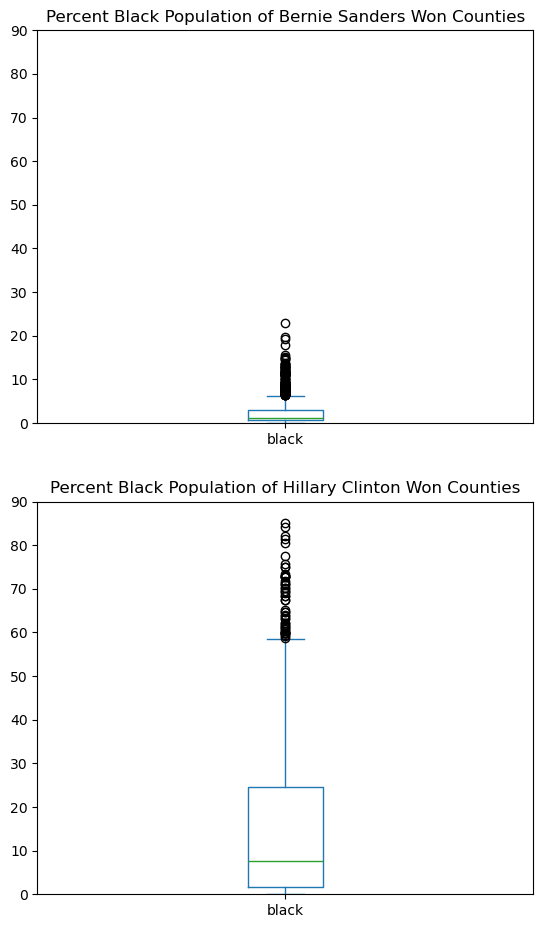

In [65]:
plt.figure()
plt.subplot(2,1,1)
berniewin["black"].plot(kind="box")
plt.title("Percent Black Population of Bernie Sanders Won Counties")
ax = plt.gca()
ax.set_ylim([0,90])
plt.subplot(2,1,2)
plt.title("Percent Black Population of Hillary Clinton Won Counties")
plt.subplots_adjust(top=1.9,bottom=.1)
ax = plt.gca()
ax.set_ylim([0,90])
hillarywin["black"].plot(kind="box")

As seen above, Clinton won significantly more counties with large african american populations than Sanders. This is evident because the county with the largest black population that Sanders won was under 25%, whereas almost 25% of Clinton's won counties had higher black populations than that. While county population sizes could mean this effect is not as great as it seems, the fact that Clinton is clearly winning with such a large demographic is another key factor in her eventual success.

### Performance among Hispanic Voters

The next large demographic group to investigate is Hispanic voters, with the same boxplots as before.

<Axes: title={'center': 'Percent Hispanic Population of Hillary Clinton Won Counties'}>

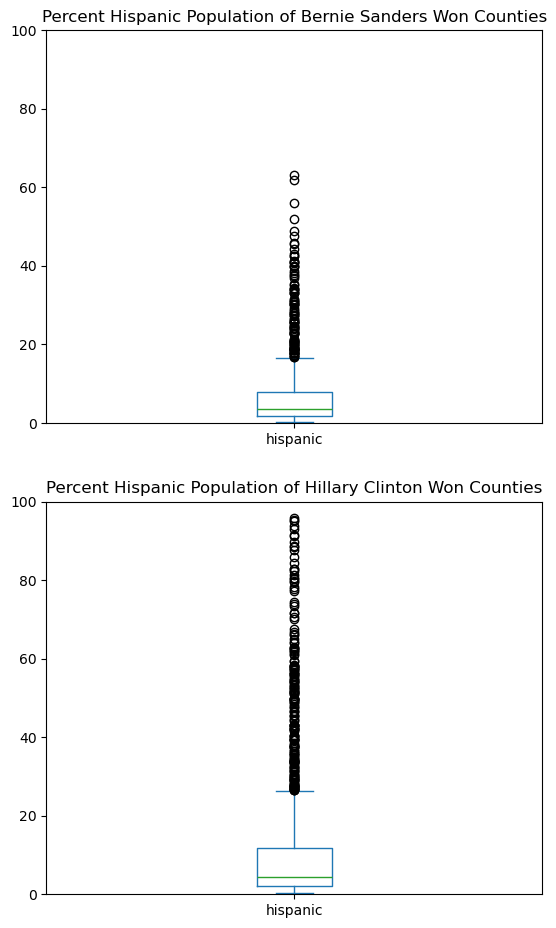

In [67]:
plt.figure()
plt.subplot(2,1,1)
berniewin["hispanic"].plot(kind="box")
plt.title("Percent Hispanic Population of Bernie Sanders Won Counties")
ax = plt.gca()
ax.set_ylim([0,100])
plt.subplot(2,1,2)
plt.title("Percent Hispanic Population of Hillary Clinton Won Counties")
plt.subplots_adjust(top=1.9,bottom=.1)
ax = plt.gca()
ax.set_ylim([0,100])
hillarywin["hispanic"].plot(kind="box")

The results for these two plots show that there was much less of a difference between the two candidates among Hispanic voters, as the means for each graph are almost identical. Therefore, Sanders' performance among Hispanic voters is unlikely to be a significant reason for his loss.

### General Trends 

With our analysis of won counties for each candidate complete, I will now turn to the whole dataset to see if there are any other interesting things to note. The first step for this will be to create a new dataframe which will include multiple rows per county for each candidate that got votes, instead of just the winner. The same data cleaning of renaming and removing some columns will be done again.

In [84]:
allvotes=pd.merge(democrat,demographics,on="fips")
allvotes=allvotes.drop(["state_abbreviation_y","state_abbreviation_x","county_y","fips"],axis="columns")
allvotes=allvotes.rename(columns={"county_x":"county"})
allvotes.head()

,state,county,party,candidate,votes,fraction_votes,income,hispanic,white,college,density,female,black
0,Alabama,Autauga,Democrat,Bernie Sanders,544,0.182,53682,2.7,75.6,20.9,91.8,51.4,18.7
1,Alabama,Autauga,Democrat,Hillary Clinton,2387,0.800,53682,2.7,75.6,20.9,91.8,51.4,18.7
2,Alabama,Baldwin,Democrat,Bernie Sanders,2694,0.329,50221,4.6,83.0,27.7,114.6,51.2,9.6
3,Alabama,Baldwin,Democrat,Hillary Clinton,5290,0.647,50221,4.6,83.0,27.7,114.6,51.2,9.6
4,Alabama,Barbour,Democrat,Bernie Sanders,222,0.078,32911,4.5,46.6,13.4,31.0,46.6,47.6


Next I will group by candidates and sum votes across all counties.

In [85]:
allvotes.groupby("candidate")["votes"].sum()

candidate
 Uncommitted             43
Bernie Sanders     10332812
Hillary Clinton    14122335
Martin O'Malley         752
Name: votes, dtype: int64

While Hillary Clinton and Bernie Sanders got well over 10 million votes each, the dataset also contains votes for Uncommitted and Martin O'Malley. Neither of these were awarded any delegates to the Democratic National Convention, so I will ignore them for the rest of my analysis.

In [86]:
allvotes=allvotes[(allvotes["candidate"]=="Bernie Sanders") |  (allvotes["candidate"]=="Hillary Clinton")]
allvotes.head()

,state,county,party,candidate,votes,fraction_votes,income,hispanic,white,college,density,female,black
0,Alabama,Autauga,Democrat,Bernie Sanders,544,0.182,53682,2.7,75.6,20.9,91.8,51.4,18.7
1,Alabama,Autauga,Democrat,Hillary Clinton,2387,0.800,53682,2.7,75.6,20.9,91.8,51.4,18.7
2,Alabama,Baldwin,Democrat,Bernie Sanders,2694,0.329,50221,4.6,83.0,27.7,114.6,51.2,9.6
3,Alabama,Baldwin,Democrat,Hillary Clinton,5290,0.647,50221,4.6,83.0,27.7,114.6,51.2,9.6
4,Alabama,Barbour,Democrat,Bernie Sanders,222,0.078,32911,4.5,46.6,13.4,31.0,46.6,47.6


In order to find differences between the two candidates among all demographics, I will group the dataset by candidate and return the mean for each column.

In [89]:
allvotes.groupby("candidate")[["income","college","white","hispanic","black","female","density","fraction_votes"]].mean()

,income,college,white,hispanic,black,female,density,fraction_votes
candidate,,,,,,,,
Bernie Sanders,45164.875268,19.320872,76.269979,9.395711,10.097034,49.965976,265.817334,0.429748
Hillary Clinton,45164.875268,19.320872,76.269979,9.395711,10.097034,49.965976,265.817334,0.536009


An interesting problem has occurred above, which is that since there are so many counties with tiny populations and even tinier voterbases in the Democratic Primary, the mean values for all of the demographics other than the fraction of votes won are almost identical. I fix this by filtering out counties with fewer than 1000 votes. This leaves 2433 rows to work with, which is plenty for extracting insights on the differences between the two candidates.

In [90]:
allvotes1k=allvotes[allvotes["votes"]>1000]
display(allvotes1k)
allvotes1k.groupby("candidate")[["income","college","white","hispanic","black","female","density","fraction_votes"]].mean()

,state,county,party,candidate,votes,fraction_votes,income,hispanic,white,college,density,female,black
1,Alabama,Autauga,Democrat,Hillary Clinton,2387,0.800,53682,2.7,75.6,20.9,91.8,51.4,18.7
2,Alabama,Baldwin,Democrat,Bernie Sanders,2694,0.329,50221,4.6,83.0,27.7,114.6,51.2,9.6
3,Alabama,Baldwin,Democrat,Hillary Clinton,5290,0.647,50221,4.6,83.0,27.7,114.6,51.2,9.6
5,Alabama,Barbour,Democrat,Hillary Clinton,2567,0.906,32911,4.5,46.6,13.4,31.0,46.6,47.6
11,Alabama,Bullock,Democrat,Hillary Clinton,2451,0.913,32033,7.5,22.1,12.5,17.5,45.3,70.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5743,Wisconsin,Waushara,Democrat,Hillary Clinton,1181,0.438,43070,6.4,89.8,14.3,39.1,47.3,2.1
5744,Wisconsin,Winnebago,Democrat,Bernie Sanders,17818,0.612,51010,3.9,89.6,25.5,384.3,49.7,2.0
5745,Wisconsin,Winnebago,Democrat,Hillary Clinton,11193,0.385,51010,3.9,89.6,25.5,384.3,49.7,2.0
5746,Wisconsin,Wood,Democrat,Bernie Sanders,6747,0.602,47685,2.7,93.1,18.8,94.2,50.6,0.7


,income,college,white,hispanic,black,female,density,fraction_votes
candidate,,,,,,,,
Bernie Sanders,50089.054659,23.865771,75.966129,9.430108,9.299821,50.537724,577.481989,0.469324
Hillary Clinton,48017.094913,22.306530,71.046621,9.811162,14.575171,50.583144,505.803872,0.567716


The important differences between the two candidates seen above are in the income, black, and density columns. All three of these have been discussed earlier in this report in the context of counties won, but it seems that even with the larger dataset There are still significant differences between the candidates in these categories. It is interesting to note that in the graph earlier of population density vs income, it appeared that Clinton was winning with the highest density and highest income counties. This is in contrast to this result, where Bernie significantly leads in both. I think this is easily explained by the fact that there are so many more counties closer to the average of the data than the outliers that were visible above, and thus this result where Bernie wins counties higher income and population density on average makes more sense. 

### Limitations

I acknowledge that the conclusions drawn from this analysis are limited by the fact that the data is based on county level results, which means that taking averages is skewed towards more sparsely populated counties as well as counties with otherwise abnormal demographics. I believe I offset this by not including most small sample size results, though this is something to keep in mind. Also, all of this is ignoring that the election took place in real life with all sorts of confounding variables such as media coverage, which may not be visible in this data. 

### Conclusion

I can conclude with confidence that there were significant differences in the demographics of each candidate's voters, and that these differences were responsible for a large part of Clinton's win in the primary election. While Sanders won among more white, high earning city dwellers, this was no match for Clinton's lead among poorer voters, rural voters, and minority voters which carried her to victory.